In [1]:
import numpy as np
import os
datapath = './BanglaLekha_Numerals_Dataset'
preprocessed = './Preprocessed_Dataset'

if os.path.exists(datapath):
    classes = os.listdir(os.path.join(datapath))
    print(f"Classes : {classes}\nNumber of classes = {len(classes)}")
else:
    print("Dataset folder not available")

if not os.path.exists(preprocessed):
    os.mkdir(preprocessed)

Classes : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of classes = 10


# Dataset EDA

You can perform more EDA. This dataset is very simple, therefore, I am only showing the per-class sample count and plotting them using a bar graph.

## Check distribution

[]

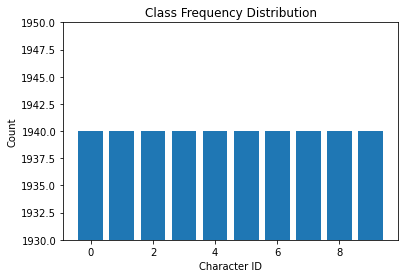

In [2]:
from collections import defaultdict
label_count = defaultdict(int)
for cl in classes :
    num_samples = len(os.listdir(os.path.join(datapath, cl)))
    label_count[int(cl)] = num_samples

from matplotlib import pyplot as plt
plt.bar(label_count.keys(), label_count.values())
plt.xlabel('Character ID')
plt.ylabel('Count')
plt.title('Class Frequency Distribution')
plt.ylim(min(label_count.values())-10, max(label_count.values())+10)
plt.plot()

## Visualize a random image

Class : 3


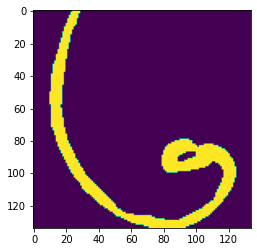

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

random_label = str(np.random.randint(0, len(classes)))
all_imgs = os.listdir(os.path.join(datapath, random_label))
random_image = np.random.randint(0, len(all_imgs)-1)

random_image = Image.open(os.path.join(datapath, random_label, all_imgs[random_image]))
plt.imshow(np.asarray(random_image))
print(f"Class : {random_label}")

# Data Split

It is better to partition the data first, then perform the resizing. Try not to change the dataset in-place.

In [4]:
import shutil, os

if os.path.exists(os.path.join(preprocessed, 'train')):
    shutil.rmtree(os.path.join(preprocessed, 'train'))

if os.path.exists(os.path.join(preprocessed, 'val')):
    shutil.rmtree(os.path.join(preprocessed, 'val'))

if not os.path.exists(os.path.join(preprocessed, 'train')):
    os.mkdir(os.path.join(preprocessed, 'train'))
    for i in classes:
        os.mkdir(os.path.join(preprocessed, 'train', i))

if not os.path.exists(os.path.join(preprocessed, 'val')):
    os.mkdir(os.path.join(preprocessed, 'val'))
    for i in classes:
        os.mkdir(os.path.join(preprocessed, 'val', i))

# This snippet will make sure Class Imbalance does not happen
# We have already seen, each class has same number of images, therefore,
# we just need to make sure, the division also happens equally
for cl in classes :
    all_imgs = os.listdir(os.path.join(datapath, cl))
    train_size = int(len(all_imgs) * 0.85)
    for tr in all_imgs[:train_size]:
        shutil.copy(os.path.join(datapath, cl, tr), os.path.join(preprocessed, 'train', cl, tr))
    for vl in all_imgs[train_size:]:
        shutil.copy(os.path.join(datapath, cl, vl), os.path.join(preprocessed, 'val', cl, vl))

# This will make sure that all the classes have got same number of Train and Val samples
total_train = 0
total_val = 0
for cl in classes :
    num_train_samples = len(os.listdir(os.path.join(preprocessed, 'train', cl)))
    total_train += num_train_samples
    num_val_samples = len(os.listdir(os.path.join(preprocessed, 'val', cl)))
    total_val += num_val_samples
    print(f"Class {cl} contains :\nTraining samples : {num_train_samples}\tValidation samples : {num_val_samples}")
print(f"Total Training samples : {total_train}\tTotal Validation samples : {total_val}")

Class 0 contains :
Training samples : 1649	Validation samples : 291
Class 1 contains :
Training samples : 1649	Validation samples : 291
Class 2 contains :
Training samples : 1649	Validation samples : 291
Class 3 contains :
Training samples : 1649	Validation samples : 291
Class 4 contains :
Training samples : 1649	Validation samples : 291
Class 5 contains :
Training samples : 1649	Validation samples : 291
Class 6 contains :
Training samples : 1649	Validation samples : 291
Class 7 contains :
Training samples : 1649	Validation samples : 291
Class 8 contains :
Training samples : 1649	Validation samples : 291
Class 9 contains :
Training samples : 1649	Validation samples : 291
Total Training samples : 16490	Total Validation samples : 2910


# Resizing data
The `resize()` method below will make all the images square is shape by padding them based on their individual width and height values

In [5]:
import torchvision.transforms.functional as F
import math

def resize(img):
    w, h = img.size # PIL Image 'size' returns (width, height) tuple
    resized = None
    if h > w :
        padding = h - w
        if padding % 2 == 0:
            left = int(padding/2)
            right = int(padding/2)
        else:
            left = math.floor(padding/2)
            right = math.ceil(padding/2)
        resized = F.pad(img, (left, 0, right, 0)) # left, top, right, bottom
    elif h < w :
        padding = w - h
        if padding % 2 == 0:
            top = int(padding/2)
            bottom = int(padding/2)
        else:
            top = math.floor(padding/2)
            bottom = math.ceil(padding/2)
        resized = F.pad(img, (0, top, 0, bottom))
    else:
        return img
    return resized

for split in ['train', 'val']:
    for cl in classes :
        all_images = os.listdir(os.path.join(preprocessed, split, cl))
        for image in all_images :
            img = Image.open(os.path.join(preprocessed, split, cl, image))
            resized = resize(img)
            resized.save(os.path.join(preprocessed, split, cl, image))

c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
